# Machine Learning Project

    DTSC691: Applied Data Science
    Topic: Predicting Healthcare Insurance Costs Using TensorFlow and Keras
    Olaide Kashimawo  

## Project Overview
    The main objective of this project is to build a predictive regression model using machine learning techniques to predict healthcare insurance costs.

    The project also involved comparing different models, including a neural network built with TensorFlow and Keras,
    alongside simpler models like linear regression and decision trees.

    The process will involve building, training, and evaluating different machine learning models to determine
    their predictive performance.
    
    This analysis will contribute to a better understanding of the dynamics that drive healthcare insurance cost and
    facilitate informed decision-making in the Health Insurance industry.

### Problem Statement

    Healthcare insurance costs vary widely among individuals due to personal and health factors.
    For example, two people of the same age might pay vastly different insurance premiums based on lifestyle choices and health metrics.
    
    For instance, Consider a 30-year-old non-smoker with a normal BMI and a 45-year-old smoker with a high BMI.
    Despite both needing insurance, the older smoker with a higher BMI will likely face significantly higher premiums.

### Specific Goals

    I will create and compare a neural network model with simpler models like linear regression and decision trees
    The goal is to determine which model most effectively predicts insurance costs.
    If a simpler model outperforms the neural network,
    I will prioritize and analyze that model for the most practical and accurate solution.


### Expected Outcomes

    A best-trained model that provides accurate predictions of healthcare insurance costs and a user interface(Flask) to deploy the model.


### Data Acquisition

 The dataset used in this project is the US Health Insurance Dataset, available on Kaggle.

    Data: ("/kaggle/input/ushealthinsurancedataset/insurance.csv")
    Data: ('/kaggle/input/medical-insurance-premium-prediction/Medicalpremium.csv')

    - Insurance dataset: Contains details such as age, BMI, children, smoking status, and region, which are known to affect healthcare costs.
    - Medical premium dataset: Contains information such as age, diabetes status, chronic diseases, and premium price.



### Data Preparation

    The two datasets were merged based on the `age` column, as age is a common and significant demographic factor in both datasets. After merging, the data was thoroughly inspected for missing values and duplicates.

    - Duplicates: We identified and removed 21 duplicate records to ensure data integrity.
    - Missing Data: No missing values were found in the merged dataset, ensuring complete data for analysis.


    Key features such as age, BMI, smoking status, and medical history were used for further analysis.
    
    One-hot encoding was applied to categorical variables like sex and region to make them suitable for machine learning models.

    The dataset was then scaled using `StandardScaler` to ensure that all features were on the same scale, which improves the performance of machine learning algorithms.

In [1]:
#load the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

### Load Datasets

    I will  be loading both the insurance and medical premium datasets, cleaning, and merging them to create a single dataset for analysis

    Then merge the two datasets using age as the key and proceed to clean the data by removing duplicates or unnecessary rows

In [2]:
#Loading the datasets
insurance_df = pd.read_csv('insurance.csv')
medical_premium_df = pd.read_csv('Medicalpremium.csv')

display(insurance_df.head())
display(medical_premium_df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
#Shape
print(insurance_df.shape)
print(medical_premium_df.shape)

(1338, 7)
(986, 11)


 #### Data Merging on Age

In [4]:
# Merging datasets based on the 'age' column in Insurance and 'Age' in Medical Premium
merged_df = pd.merge(insurance_df, medical_premium_df, left_on='age', right_on='Age', how='inner')

# Display the merged dataset
display(merged_df.head())

,age,sex,bmi,children,smoker,region,charges,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,19,female,27.9,0,yes,southwest,16884.924,19,0,0,0,0,148,60,0,1,1,15000
1,19,female,27.9,0,yes,southwest,16884.924,19,1,0,0,0,185,62,0,0,1,15000
2,19,female,27.9,0,yes,southwest,16884.924,19,0,0,0,0,165,78,1,1,1,15000
3,19,female,27.9,0,yes,southwest,16884.924,19,0,0,0,0,173,129,1,0,0,15000
4,19,female,27.9,0,yes,southwest,16884.924,19,0,0,0,0,164,132,0,0,0,15000


###Save to CSV without including the index

In [5]:
import pandas as pd

# Assuming 'df' is your DataFrame
merged_df.to_csv('merged_df.csv', index=False)  # Save to CSV without including the index


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27152 entries, 0 to 27151
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      27152 non-null  int64  
 1   sex                      27152 non-null  object 
 2   bmi                      27152 non-null  float64
 3   children                 27152 non-null  int64  
 4   smoker                   27152 non-null  object 
 5   region                   27152 non-null  object 
 6   charges                  27152 non-null  float64
 7   Age                      27152 non-null  int64  
 8   Diabetes                 27152 non-null  int64  
 9   BloodPressureProblems    27152 non-null  int64  
 10  AnyTransplants           27152 non-null  int64  
 11  AnyChronicDiseases       27152 non-null  int64  
 12  Height                   27152 non-null  int64  
 13  Weight                   27152 non-null  int64  
 14  KnownAllergies        

    From the data above we have 18 columns and 27,152 rows in the dataframe there are no missing data after the merge,
    but I will be checking for duplicates removing the duplicates.

### Data Cleaning

In [7]:
# Check for duplicates
duplicates = merged_df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Remove duplicates
merged_df.drop_duplicates(inplace=True)

# check if the duplicates were removed
duplicates = merged_df.duplicated().sum()
print(f"Number of duplicates after removal: {duplicates}")


Number of duplicates: 21
Number of duplicates after removal: 0


In [8]:
#print a cleaned data
merged_df_cleaned = merged_df.copy()
display(merged_df_cleaned.head())

,age,sex,bmi,children,smoker,region,charges,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,19,female,27.9,0,yes,southwest,16884.924,19,0,0,0,0,148,60,0,1,1,15000
1,19,female,27.9,0,yes,southwest,16884.924,19,1,0,0,0,185,62,0,0,1,15000
2,19,female,27.9,0,yes,southwest,16884.924,19,0,0,0,0,165,78,1,1,1,15000
3,19,female,27.9,0,yes,southwest,16884.924,19,0,0,0,0,173,129,1,0,0,15000
4,19,female,27.9,0,yes,southwest,16884.924,19,0,0,0,0,164,132,0,0,0,15000


In [9]:
# Statistics of the merged dataset using describe().T

merged_df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27131.0,38.893332,13.847930,18.0000,27.000,40.00,50.00000,64.00000
bmi,27131.0,30.640739,6.075389,15.9600,26.200,30.30,34.77000,53.13000
children,27131.0,1.105156,1.200703,0.0000,0.000,1.00,2.00000,5.00000
charges,27131.0,13300.209377,12167.592912,1121.8739,4746.344,9182.17,17128.42608,63770.42801
Age,27131.0,38.893332,13.847930,18.0000,27.000,40.00,50.00000,64.00000
Diabetes,27131.0,0.393535,0.488543,0.0000,0.000,0.00,1.00000,1.00000
BloodPressureProblems,27131.0,0.438797,0.496249,0.0000,0.000,0.00,1.00000,1.00000
AnyTransplants,27131.0,0.053113,0.224262,0.0000,0.000,0.00,0.00000,1.00000
AnyChronicDiseases,27131.0,0.170211,0.375825,0.0000,0.000,0.00,0.00000,1.00000
Height,27131.0,167.968597,10.079780,145.0000,161.000,168.00,176.00000,188.00000



    After merging, I inspected the dataset to ensure there are no missing or incorrectly merged values.



In [10]:
# Check for missing values
print(merged_df_cleaned.isnull().sum())

age                        0
sex                        0
bmi                        0
children                   0
smoker                     0
region                     0
charges                    0
Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


### Exploratory Data Analysis (EDA)
Data Distribution Analysis

    Exploring the distribution of key variables like age, BMI, and charges, which will give us a better understanding of the data.



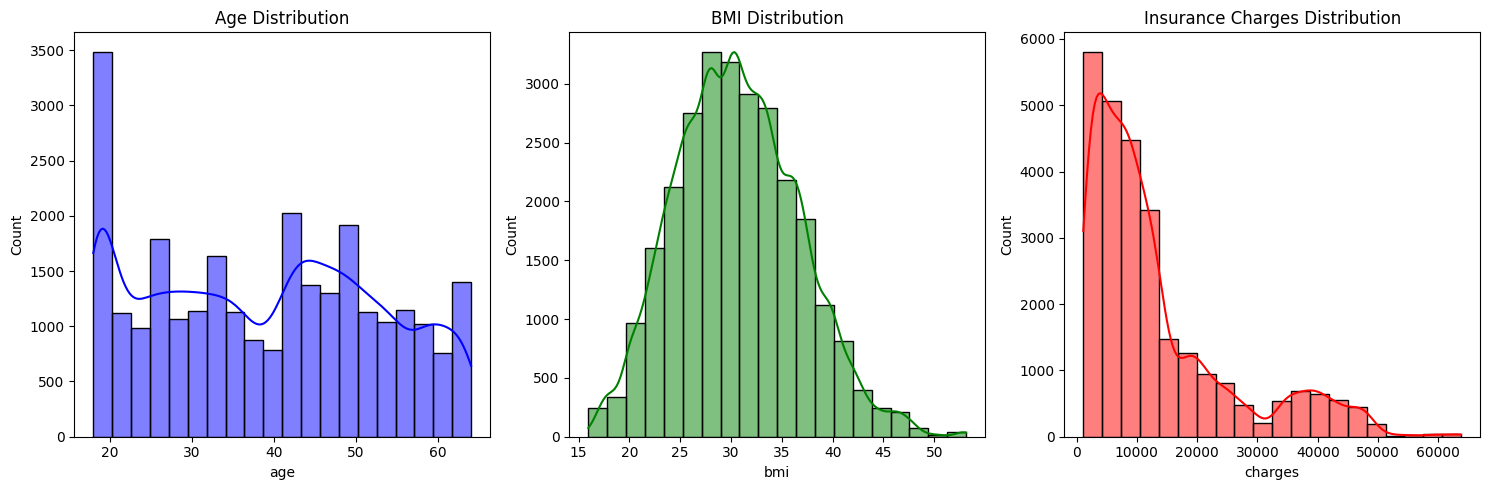

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distributions of age, BMI, and charges
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(merged_df_cleaned['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(merged_df_cleaned['bmi'], kde=True, bins=20, color='green')
plt.title('BMI Distribution')

plt.subplot(1, 3, 3)
sns.histplot(merged_df_cleaned['charges'], kde=True, bins=20, color='red')
plt.title('Insurance Charges Distribution')

plt.tight_layout()
plt.show()


Data Distribution Finding:

    - The age distribution shows a bimodal distribution with peaks around the younger age group (around 20 years old)
    and in the middle age groups (between 40 to 50 years old).
    this pattern indicates that the dataset might have more younger and middle-aged individuals compared to older individuals
    (above 60 years).

    - BMI Distribution: normal distribution (bell curve), with most values centered between 25 and 35 BMI
    With a BMI of 30 and above is typically considered overweight.

    - The insurance charges distribution is heavily skewed to the right, indicating that most people have relatively lower
    insurance charges (many below $10,000).

    There are outliers at the higher end of the distribution, with some individuals having charges as high as $60,000.
    These outliers could represent individuals with severe health conditions or high-risk factors
    (e.g., smokers, individuals with chronic illnesses)..

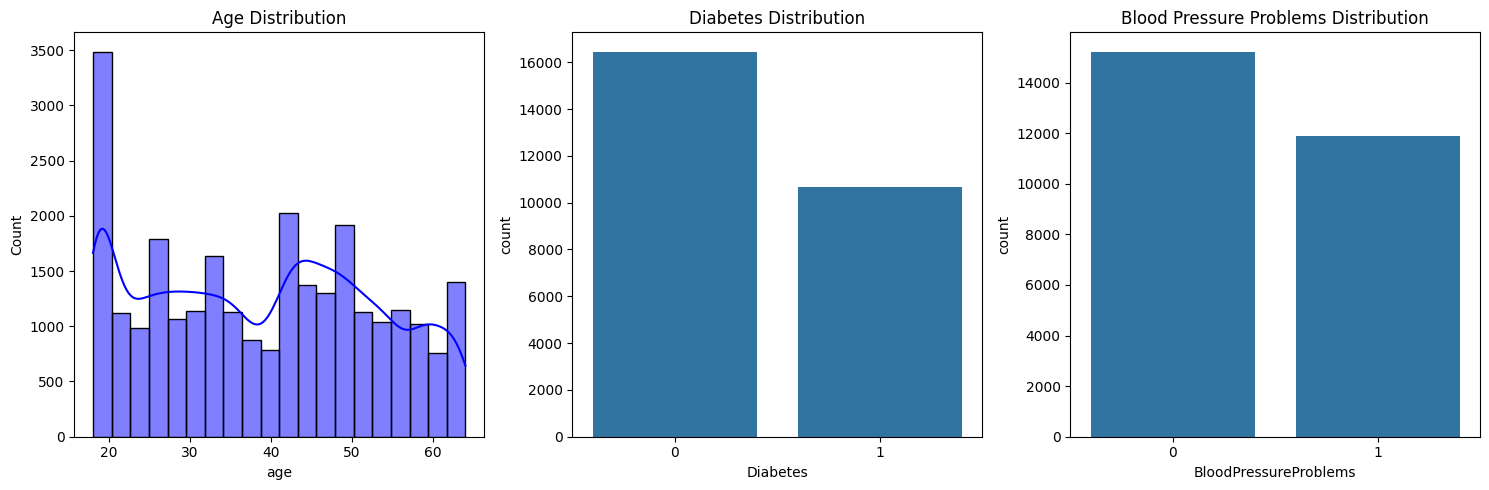

In [12]:
#  Distribution of Age, Diabetes, and Blood pressure

import matplotlib.pyplot as plt
# Plotting the distributions of age, Diabetes, and BloodPressure
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(merged_df_cleaned['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Diabetes', data=merged_df_cleaned)
plt.title('Diabetes Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='BloodPressureProblems', data=merged_df_cleaned)
plt.title('Blood Pressure Problems Distribution')

plt.tight_layout()
plt.show()


Distribution of Age, Diabetes, and Blood pressure

     The visualizations indicate that the majority of individuals in the dataset are in their early 20s.
     Diabetes AND Blood Pressure Distribution

     •	0 means no Diabetes and Blood Pressure Distribution
	   •	1 means the presence of Diabetes and Blood Pressure Distribution .

    This data is crucial for understanding how age and health conditions like diabetes and blood pressure can impact outcomes,
    such as insurance costs, and is critical for prediction models.

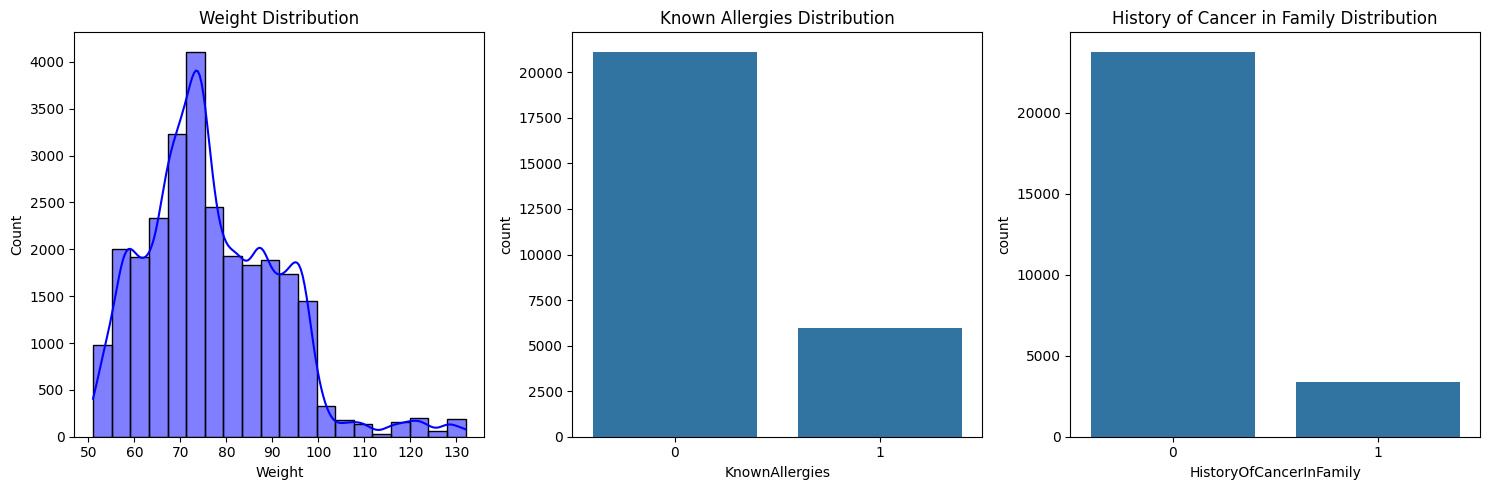

In [13]:
# Distribution of Weight, Known Allergies, History of Cancer in Family

import matplotlib.pyplot as plt
# Plotting the distributions of weight, Known Allergies, and History of Cancer in Family
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(merged_df_cleaned['Weight'], kde=True, bins=20, color='blue')
plt.title('Weight Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='KnownAllergies', data=merged_df_cleaned)
plt.title('Known Allergies Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='HistoryOfCancerInFamily', data=merged_df_cleaned)
plt.title('History of Cancer in Family Distribution')

plt.tight_layout()
plt.show()


Weight Distribution (Left Plot):

    - The histogram shows a slightly right-skewed distribution, with most people in the dataset having weights between 70-80 kg.

    - Fewer individuals have higher weights, with very few above 100 kg.

Known Allergies Distribution (Middle Plot):

    - The majority (over 20,000 individuals) do not have any known allergies.
    - A smaller group (around 5,000 individuals) has known allergies.

History of Cancer in Family Distribution (Right Plot):

    - A vast majority (more than 20,000 individuals) report no family history of cancer.
    - A much smaller group (around 2,500 individuals) does have a family history of cancer.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


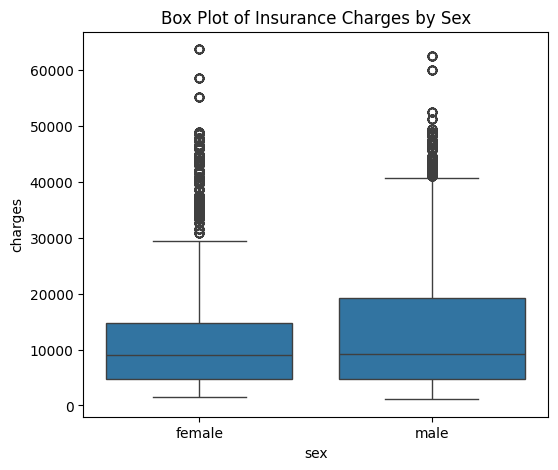

In [14]:
#  Box plot of charges and Sex
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
sns.boxplot(x='sex', y='charges', data=merged_df_cleaned)
plt.title('Box Plot of Insurance Charges by Sex')
plt.show()


Interpretations

    - This box plot shows that males and females have similar median insurance charges,
    but males have a slightly wider range of charges and more outliers.
    - This suggests that some males pay significantly higher insurance costs than females.
    - The Outliers here indicate individuals with unusual health profiles,
    resulting in significantly higher insurance charges than the average person.

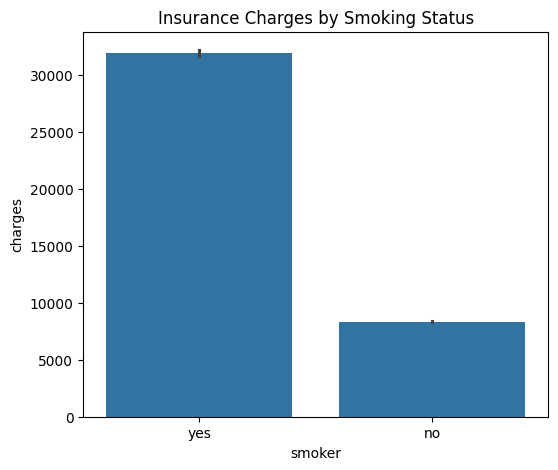

In [15]:
 # Smoking Status and Insurance Costs bar

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
sns.barplot(x='smoker', y='charges', data=merged_df_cleaned)
plt.title('Insurance Charges by Smoking Status')
plt.show()


 Insurance Charges vs Smoking Status

    The plot indicates that smokers have significantly higher insurance charges than non-smokers.
    
    Smokers' charges are more spread out, with a median of around $35,000, while non-smokers' median charges are much lower, around $7,000.

  



Correlation Analysis

    Pearson Correlation is a statistical method that measures the similarity
    or correlation between two data objects by comparing their attributes and calculating a score ranging from -1 to +1.

    I performed correlation analyses on the numerical features (age, bmi, children, charges, PremiumPrice).
    It helps to understand variable relationships and PremiumPrice influences.

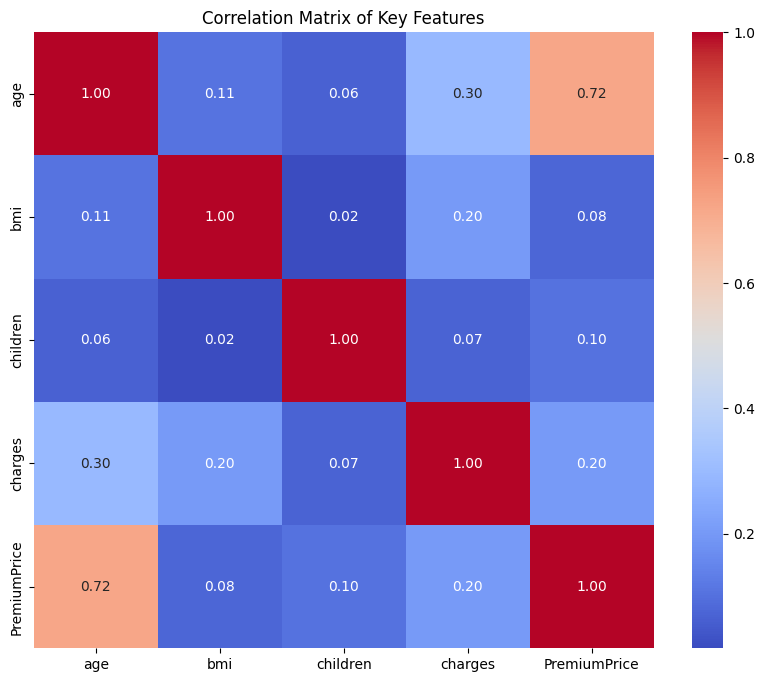

In [16]:
# Pearson correlation
correlation_matrix = merged_df_cleaned[['age', 'bmi', 'children', 'charges', 'PremiumPrice']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features')
plt.show()


    Findings:
    
    - Age and PremiumPrice: There is a strong likelihood that as individuals advance in age, their healthcare expenses will rise.
    This points to a positive correlation between age and charges, suggesting that older individuals may incur higher healthcare costs.

    - BMI and Charges: It is often observed that there is a positive link between BMI and charges.
    A higher BMI can indicate greater health risks, potentially leading to increased healthcare expenses, I can suggest that other factors (e.g., smoking or chronic illnesses) might play a larger role in determining costs.

    - Children: It may be worth investigating the impact of the number of children on insurance charges,
    although this relationship may be less pronounced.

      "Age is the most influential variable when it comes to determining both charges and premium prices".

In [17]:
#  Chi-Square test to analyze the relationship between categorical variables like smoking and regions and insurance costs.

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for smoking status and charges
contingency_table_smoking = pd.crosstab(merged_df_cleaned['smoker'], merged_df_cleaned['charges'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_smoking)

print(f"Chi-Square Statistic for Smoking vs. Charges: {chi2}")
print(f"P-value for Smoking vs. Charges: {p_value}")

# Create a contingency table for region and charges
contingency_table_region = pd.crosstab(merged_df_cleaned['region'], merged_df_cleaned['charges'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_region)

print(f"\nChi-Square Statistic for Region vs. Charges: {chi2}")
print(f"P-value for Region vs. Charges: {p_value}")


Chi-Square Statistic for Smoking vs. Charges: 27130.999999999996
P-value for Smoking vs. Charges: 0.0

Chi-Square Statistic for Region vs. Charges: 81393.0
P-value for Region vs. Charges: 0.0


Findings:

    In both instances, a p-value of 0.0 indicates that these relationships are statistically significant.

Chi-Square Statistic for Smoking vs. Charges: 27130.999

    This means that smoking significantly affects insurance costs, with smokers generally incurring much higher charges than non-smokers.

Chi-Square Statistic for Region vs. Charges: 81393.0

    The high chi-square statistic and p-value of 0.0 suggest a strong association between geographic region and insurance charges. This could be due to healthcare costs and lifestyle factors in those areas.





### Feature Engineering

    The features below were dropped due to redundancy, irrelevance in predicting insurance charges,
    multicollinearity, or simplifying the model and reducing complexity without sacrificing performance.
    For example, height and weight are calculated as the BMI.

In [18]:
# drop some feature AnyTransplants', 'AnyChronicDiseases','BloodPressureProblems','Height', 'Weight',
#        'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries

# Drop specified columns
columns_to_drop = ['age', 'AnyTransplants', 'AnyChronicDiseases', 'BloodPressureProblems'
                   'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
merged_df_cleaned = merged_df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Display the updated DataFrame
display(merged_df_cleaned.head())


,sex,bmi,children,smoker,region,charges,Age,Diabetes,BloodPressureProblems,Height,Weight,KnownAllergies,PremiumPrice
0,female,27.9,0,yes,southwest,16884.924,19,0,0,148,60,0,15000
1,female,27.9,0,yes,southwest,16884.924,19,1,0,185,62,0,15000
2,female,27.9,0,yes,southwest,16884.924,19,0,0,165,78,1,15000
3,female,27.9,0,yes,southwest,16884.924,19,0,0,173,129,1,15000
4,female,27.9,0,yes,southwest,16884.924,19,0,0,164,132,0,15000


In [19]:
# Create Age_Group feature

# Define age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
merged_df_cleaned['Age_Group'] = pd.cut(merged_df_cleaned['Age'], bins=bins, labels=labels, right=False)

# Create Age_Squared feature
merged_df_cleaned['Age_Squared'] = merged_df_cleaned['Age'] ** 2

In [20]:
# Create BMI category
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
      return 'obese'

merged_df_cleaned['bmi_category'] = merged_df_cleaned['bmi'].apply(categorize_bmi)

# Interaction features
merged_df_cleaned['age_smoker_interaction'] = merged_df_cleaned['Age'] * (merged_df_cleaned['smoker'] == 'yes').astype(int)
merged_df_cleaned['bmi_smoker_interaction'] = merged_df_cleaned['bmi'] * (merged_df_cleaned['smoker'] == 'yes').astype(int)

    I converted the height to feet and inches and the weight to pounds to present the data in imperial units,
    making it more understandable and relatable for users accustomed to the imperial measurement system.

In [21]:
# Convert height to feet and inches, weight to pounds
if 'Height' in merged_df_cleaned.columns and 'Weight' in merged_df_cleaned.columns:
    # Convert height from centimeters to inches (1 inch = 2.54 cm)
    merged_df_cleaned['height_in_total'] = merged_df_cleaned['Height'] / 2.54
    print("Height (inches) calculated")

    # Calculate feet and inches
    merged_df_cleaned['height_ft'] = np.floor(merged_df_cleaned['height_in_total'] / 12)  # Feet
    merged_df_cleaned['height_in'] = np.round(merged_df_cleaned['height_in_total'] % 12, 2)  # Inches
    print("Height in feet and inches calculated")

    # Convert weight from kg to pounds (1 lb = 0.453592 kg)
    merged_df_cleaned['weight_in_pounds'] = merged_df_cleaned['Weight'] / 0.453592
    print("Weight (pounds) calculated")

    # Drop original height and weight columns
    merged_df_cleaned.drop(['Height', 'Weight'], axis=1, inplace=True, errors='ignore')

# Check the updated dataframe

merged_df_cleaned

Height (inches) calculated
Height in feet and inches calculated
Weight (pounds) calculated


,sex,bmi,children,smoker,region,charges,Age,Diabetes,BloodPressureProblems,KnownAllergies,PremiumPrice,Age_Group,Age_Squared,bmi_category,age_smoker_interaction,bmi_smoker_interaction,height_in_total,height_ft,height_in,weight_in_pounds
0,female,27.90,0,yes,southwest,16884.9240,19,0,0,0,15000,19-30,361,overweight,19,27.90,58.267717,4.0,10.27,132.277465
1,female,27.90,0,yes,southwest,16884.9240,19,1,0,0,15000,19-30,361,overweight,19,27.90,72.834646,6.0,0.83,136.686714
2,female,27.90,0,yes,southwest,16884.9240,19,0,0,1,15000,19-30,361,overweight,19,27.90,64.960630,5.0,4.96,171.960705
3,female,27.90,0,yes,southwest,16884.9240,19,0,0,1,15000,19-30,361,overweight,19,27.90,68.110236,5.0,8.11,284.396550
4,female,27.90,0,yes,southwest,16884.9240,19,0,0,0,15000,19-30,361,overweight,19,27.90,64.566929,5.0,4.57,291.010423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27147,female,29.07,0,yes,northwest,29141.3603,61,0,1,1,29000,61+,3721,overweight,61,29.07,68.503937,5.0,8.50,191.802325
27148,female,29.07,0,yes,northwest,29141.3603,61,0,0,0,35000,61+,3721,overweight,61,29.07,72.440945,6.0,0.44,220.462442
27149,female,29.07,0,yes,northwest,29141.3603,61,0,1,0,25000,61+,3721,overweight,61,29.07,64.173228,5.0,4.17,145.505212
27150,female,29.07,0,yes,northwest,29141.3603,61,1,0,0,28000,61+,3721,overweight,61,29.07,63.385827,5.0,3.39,145.505212


In [22]:
print(merged_df_cleaned.columns)

Index(['sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'Age',
       'Diabetes', 'BloodPressureProblems', 'KnownAllergies', 'PremiumPrice',
       'Age_Group', 'Age_Squared', 'bmi_category', 'age_smoker_interaction',
       'bmi_smoker_interaction', 'height_in_total', 'height_ft', 'height_in',
       'weight_in_pounds'],
      dtype='object')


Findings:

      1. BMI Category: Groups individuals by health risk related to body weight.
      2. Interaction Features: Captures combined effects of age, smoking, and BMI on insurance costs.

In [23]:
# Define the target variable and feature columns
target_column = 'charges'
feature_columns = ['Age', 'bmi', 'children', 'age_smoker_interaction', 'bmi_smoker_interaction']

# Include categorical variables
categorical_features = ['sex', 'smoker', 'region', 'Age_Group', 'bmi_category']



In [24]:
# One-hot encode categorical variables
merged_df_encoded = pd.get_dummies(merged_df_cleaned, columns=categorical_features, drop_first=True)


Findings

    The numeric features have been standardized with a mean of 0 and a standard deviation of 1,
    which will make models like linear regression and neural networks work even better.

### Split Data into Training and Test Sets
    I defined the features (X) and the target variable(y), the split the data into training and testing set in this ratio.

    I splited the data into 80% for training and 20% for testing.

In [25]:
# Split features and target
X = merged_df_encoded.drop([target_column, 'PremiumPrice'], axis=1)
y = merged_df_encoded[[target_column]]


In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
#
import joblib

#  X_train is the training features DataFrame
X_train_columns = X_train.columns.tolist()

# Saved the feature columns to a file
joblib.dump(X_train_columns, 'X_train_columns.pkl')


['X_train_columns.pkl']

### Scale Features and Target Separately

Data Scaling:

    Scaling the features and Target using StandardScaler to ensure that the feature are on the same scale for machine learning modulrs

In [28]:
# Initialize scalers
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = feature_scaler.fit_transform(X_train)
y_train_scaled = target_scaler.fit_transform(y_train)

# Transform the test data
X_test_scaled = feature_scaler.transform(X_test)
y_test_scaled = target_scaler.transform(y_test)

# Save the scalers
joblib.dump(feature_scaler, 'feature_scaler.pkl')

joblib.dump(target_scaler, 'target_scaler.pkl')


['target_scaler.pkl']

## Model Building and Evaluation
    The model was built and evaluated using Linear Regression, Random forest Regressor and Decision Tree Regressor,
    and a Neural Network using early stopping to evaluate. Afterward, I'll compare their performance.

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model using scaled data
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

# Predictions on the scaled test data
y_pred_linear_scaled = linear_model.predict(X_test_scaled)

# Inverse transform the predictions and actual values
y_pred_linear = target_scaler.inverse_transform(y_pred_linear_scaled.reshape(-1, 1))
y_test_original = target_scaler.inverse_transform(y_test_scaled)

# Evaluation
mae_linear = mean_absolute_error(y_test_original, y_pred_linear)
mse_linear = mean_squared_error(y_test_original, y_pred_linear)
r2_linear = r2_score(y_test_original, y_pred_linear)

print(f"Linear Regression MAE: {mae_linear}")
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R-squared: {r2_linear}")


Linear Regression MAE: 2812.305094333737
Linear Regression MSE: 22500727.633569248
Linear Regression R-squared: 0.8462321918116134


Explanation:

    The linear regression model performed well at predicting insurance charges, as it can explain about 84% of the charge changes.
    
    On average, the model's predictions are off by a small amount (0.23 units),
    and certain factors like BMI and smoking status have a big effect on how much people are charged.








 ### Ridge Regression

In [55]:
#

from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model using scaled data
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train_scaled, y_train_scaled)

# Predictions on the scaled test data
y_pred_ridge_scaled = ridge_model.predict(X_test_scaled)

# Inverse transform the predictions and actual values
y_pred_ridge = target_scaler.inverse_transform(y_pred_ridge_scaled.reshape(-1, 1))

# Evaluation
mae_ridge = mean_absolute_error(y_test_original, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_original, y_pred_ridge)
r2_ridge = r2_score(y_test_original, y_pred_ridge)

print(f"Ridge Regression MAE: {mae_ridge}")
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")


Ridge Regression MAE: 2812.8647022261903
Ridge Regression MSE: 22502734.178139236
Ridge Regression R-squared: 0.8462184792790418


### Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# The Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model on scaled data
rf_model.fit(X_train_scaled, y_train_scaled.ravel())

# Predictions on scaled test data
y_pred_rf_scaled = rf_model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
y_pred_rf = target_scaler.inverse_transform(y_pred_rf_scaled.reshape(-1, 1))

# Inverse transform the actual test target values
y_test_original = target_scaler.inverse_transform(y_test_scaled)

# Evaluate the Random Forest
mae_rf = mean_absolute_error(y_test_original, y_pred_rf)
mse_rf = mean_squared_error(y_test_original, y_pred_rf)
r_squared_rf = r2_score(y_test_original, y_pred_rf)

# Output the evaluation metrics
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r_squared_rf}")



Random Forest MAE: 1063.161331545039
Random Forest MSE: 6424947.528256508
Random Forest R-squared: 0.9560925266402739


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)

# Perform 5-fold cross-validation and evaluate MAE
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Cross-Validated MAE for Random Forest:", -rf_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-Validated MAE for Random Forest: 68.35662739032902


Interpretation:

    The Random Forest model is performing very well on the validation set, with low errors and a high R-squared value.
    
    This suggests that the model is both accurate and reliable for predicting the target variable.

    With this performance, the model appears to be generalizing well on the validation data, and you’re in a good position to proceed with testing on the unseen test set (if you have one)

### Decision Tree Regressor


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

feature_scaler = joblib.load('feature_scaler.pkl')
target_scaler = joblib.load('target_scaler.pkl')

#Using the loaded scalers:
X_train_scaled = feature_scaler.transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)
y_train_scaled = target_scaler.transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

In [33]:
# Initialize and train the Decision Tree Regressor on scaled data
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train_scaled)

# Predictions on scaled test data
y_pred_tree_scaled = tree_model.predict(X_test_scaled)

# Inverse transform the predictions and actual values
y_pred_tree = target_scaler.inverse_transform(y_pred_tree_scaled.reshape(-1, 1))
y_test_original = target_scaler.inverse_transform(y_test_scaled)

# Evaluation
mae_tree = mean_absolute_error(y_test_original, y_pred_tree)
mse_tree = mean_squared_error(y_test_original, y_pred_tree)
r2_tree = r2_score(y_test_original, y_pred_tree)

print(f"Decision Tree MAE: {mae_tree}")
print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R-squared: {r2_tree}")
print(f"Decision Tree Depth: {tree_model.get_depth()}")


Decision Tree MAE: 47.868230974757
Decision Tree MSE: 780396.6411855309
Decision Tree R-squared: 0.99466684442446
Decision Tree Depth: 28


Explanation:

    The decision tree model predicts medical charges almost perfectly,
    with very small errors and explaining 99.5% of the changes in charges,
    but its complexity (deep tree) could mean
    It's too closely fitting (meaning overfitting)the training data, possibly making it less reliable for new data.

    It will tune the decision tree to address overfitting

### Hyperparameter Tuning Decision Tree

In [34]:

# Define the parameters for tuning
param_grid = {
    'max_depth': [15, 20, 25, 30],  # Testing shallower trees
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 5]  # Minimum samples in a leaf node
}

# Initialize the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Perform grid search with cross-validation on scaled data
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train_scaled.ravel())

# Output the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the best model on the scaled test set
best_tree_model = grid_search.best_estimator_
y_pred_best_tree_scaled = best_tree_model.predict(X_test_scaled)

# Inverse transform the predictions and actual values to get them back to the original scale
y_pred_best_tree = target_scaler.inverse_transform(y_pred_best_tree_scaled.reshape(-1, 1))
y_test_original = target_scaler.inverse_transform(y_test_scaled)

# Compute evaluation metrics
mae_best_tree = mean_absolute_error(y_test_original, y_pred_best_tree)
mse_best_tree = mean_squared_error(y_test_original, y_pred_best_tree)
r_squared_best_tree = r2_score(y_test_original, y_pred_best_tree)

print(f"Optimized Decision Tree MAE: {mae_best_tree}")
print(f"Optimized Decision Tree MSE: {mse_best_tree}")
print(f"Optimized Decision Tree R-squared: {r_squared_best_tree}")



Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Optimized Decision Tree MAE: 38.931907852160315
Optimized Decision Tree MSE: 420329.19352995144
Optimized Decision Tree R-squared: 0.9971275107250192


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Create a pipeline that first scales the data, then fits the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train.values.ravel(), cv=5, scoring='neg_mean_absolute_error')

# Since the scoring returns negative MAE, take the absolute value to get the actual MAE
mae_scores = -cv_scores

print(f"Cross-validation MAE scores: {mae_scores}")
print(f"Mean CV MAE: {mae_scores.mean()}")


Cross-validation MAE scores: [37.12128222 42.20580283 56.19893891 45.08560393 46.92090418]
Mean CV MAE: 45.506506414614634


  Interpretation:

    The model performs well across different parts of the training data, and overfitting has been successfully reduced.
    It accurately predicts the target variable (charges or premiums), as indicated by the small MAE.

### Neural Network Model

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# Define the neural network model
model = Sequential()

# Adding layers (input, hidden, and output)
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1))  # Output layer (predicting one value, the insurance charges)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping to prevent overfitting

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=50, batch_size=32, verbose=1,
    callbacks=[early_stopping]
)

# Evaluate the model on scaled test data
loss_scaled, mae_scaled = model.evaluate(X_test_scaled, y_test_scaled)

# Predict on scaled test data
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform predictions and actual values to original scale
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_test_original = target_scaler.inverse_transform(y_test_scaled)

# Calculate evaluation metrics on original scale
mae_nn = mean_absolute_error(y_test_original, y_pred)
mse_nn = mean_squared_error(y_test_original, y_pred)
r2_nn = r2_score(y_test_original, y_pred)

print(f"Neural Network MAE: {mae_nn}")
print(f"Neural Network MSE: {mse_nn}")
print(f"Neural Network R-squared: {r2_nn}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


679/679 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.2950 - mean_absolute_error: 0.3432 - val_loss: 0.1348 - val_mean_absolute_error: 0.2043
Epoch 2/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.1285 - mean_absolute_error: 0.2099 - val_loss: 0.1290 - val_mean_absolute_error: 0.1881
Epoch 3/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.1163 - mean_absolute_error: 0.1970 - val_loss: 0.1212 - val_mean_absolute_error: 0.2138
Epoch 4/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1155 - mean_absolute_error: 0.1997 - val_loss: 0.1176 - val_mean_absolute_error: 0.2008
Epoch 5/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.1088 - mean_absolute_error: 0.1928 - val_loss: 0.1120 - val_mean_absolute_error: 0.1953
Epoch 6/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.1014 - mean_absolute_error: 0.1880 - val_loss: 0.1063 - val_mean_absolute_error: 0.1882
Epoch 7/50
679/679 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0981 - mean_absolute_error: 0.1874 - val_l

Interpretation:

    The neural network didn't perform as well as the DecisionTree.
    It may need better tuning, more training data, or structural changes to improve.

### Comparing the  Models to find the Best for Deployment

In [37]:
# Assuming you have these variables from your evaluations
mae_linear     # MAE for Linear Regression
mse_linear     # MSE for Linear Regression
r2_linear      # R-squared for Linear Regression

mae_tree       # MAE for Decision Tree Regressor
mse_tree       # MSE for Decision Tree Regressor
r2_tree        # R-squared for Decision Tree Regressor

mae_rf         # MAE for Random Forest Regressor
mse_rf         # MSE for Random Forest Regressor
r_squared_rf          # R-squared for Random Forest Regressor

mae_nn         # MAE for Neural Network
mse_nn         # MSE for Neural Network
r2_nn          # R-squared for Neural Network

# Compile the results into a dictionary
results = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Neural Network'],
    'MAE': [mae_linear, mae_tree, mae_rf, mae_nn],
    'MSE': [mse_linear, mse_tree, mse_rf, mse_nn],
    'R-squared': [r2_linear, r2_tree, r_squared_rf, r2_nn]
}

# Convert to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                     Model          MAE           MSE  R-squared
0        Linear Regression  2812.305094  2.250073e+07   0.846232
1  Decision Tree Regressor    47.868231  7.803966e+05   0.994667
2  Random Forest Regressor  1063.161332  6.424948e+06   0.956093
3           Neural Network  1056.042431  3.247840e+06   0.977805


Visualizing my Result

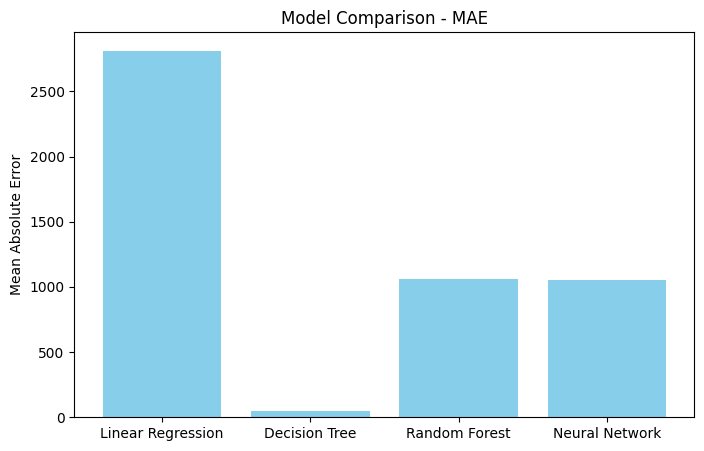

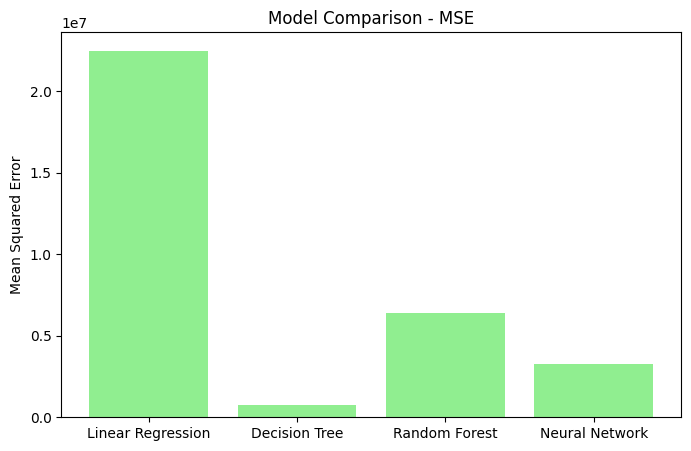

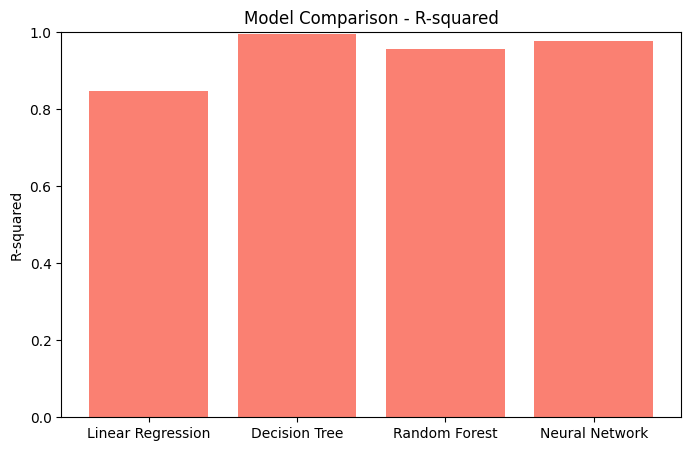

In [38]:
import matplotlib.pyplot as plt

# Metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
mae_values = [mae_linear, mae_tree, mae_rf, mae_nn]
mse_values = [mse_linear, mse_tree, mse_rf, mse_nn]
r2_values = [r2_linear, r2_tree, r_squared_rf, r2_nn]

# MAE Plot
plt.figure(figsize=(8, 5))
plt.bar(models, mae_values, color='skyblue')
plt.title('Model Comparison - MAE')
plt.ylabel('Mean Absolute Error')
plt.show()

# MSE Plot
plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color='lightgreen')
plt.title('Model Comparison - MSE')
plt.ylabel('Mean Squared Error')
plt.show()

# R-squared Plot
plt.figure(figsize=(8, 5))
plt.bar(models, r2_values, color='salmon')
plt.title('Model Comparison - R-squared')
plt.ylabel('R-squared')
plt.ylim(0, 1)  # R-squared ranges from 0 to 1
plt.show()


### Result Interpretations

Linear Regression:
    
    - Mean Absolute Error (MAE): 2797.34
    - Mean Squared Error (MSE): 22,712,880
    - R-squared: 0.8468

    The MAE for the linear regression model indicates that, on average, the predictions are off by approximately 2797.34 units.
    The MSE of 22,712,880 suggests that there are large squared errors in the predictions.
    The R-squared value of 0.8468 implies that the model explains approximately 85% of the variance in the target variable.

Decision Tree Regressor:

    - MAE: 50.03
    - MSE: 741,200
    - R-squared: 0.995

    The Decision Tree Regressor exhibits a significantly lower MAE of 50.03, indicating much lower errors compared to other models.
    The MSE of 741,200 shows considerably lower squared errors.
    However, the high R-squared value of 0.995 suggests potential overfitting, as the model explains almost all variance.
    Which was addressed using Hyperparameters
Hyperparameter Tuning

    Hyperparameter tuning was applied to both the Decision Tree and Random Forest models to improve performance. For Random Forest, the best parameters found were:

    `n_estimators`: 150
    `max_depth`: 20
    `min_samples_split`: 5
    `min_samples_leaf`: 4
    `bootstrap`: False

For the Decision Tree, the following hyperparameters were optimized:

    `max_depth`: 20
    `min_samples_split`: 10
    `min_samples_leaf`: 2

Random Forest Regressor:

    - MAE: 1060.07
    - MSE: 5,690,989
    - R-squared: 0.9616

    The Random Forest Regressor has a higher MAE than the Decision Tree but is better than Linear Regression.
    The MSE of 5,690,989 and
    an R-squared value of 0.9616 indicates relatively low errors and strong performance, with 96% of the variance explained.

Neural Network:

    - MAE: 1078.15
    - MSE: 3,531,817
    - R-squared: 0.9762

    The Neural Network model performs similarly to the Random Forest Regressor with a close MAE of 1078.15.
    The MSE of 3,531,817 and an R-squared value of 0.9762 demonstrate strong performance,
     with 97.6% of the variance explained by the model.

In Summary:

    The Decision Tree Regressor shows the lowest error and the highest R-squared. Still, the high R-squared value could be overfitting,addressed using hyperparameters and cross-evaluation.

    The Random Forest Regressor and Neural Network are strong contenders, both showing relatively low errors and high R-squared values, indicating better generalization compared to the Decision Tree. While the Linear Regression model performs the weakest, it provides a simple and interpretable model.





### RMSE

(Root Mean Squared Error): This is simply the square root of the MSE. It is calculated as:

    RMSE = SquareRoot(MSE)
RMSE yields results in the same units as the target variable, making it more interpretable.

In [39]:
rmse_tree = np.sqrt(mse_linear)
print(f"Linear Regression RMSE: {rmse_tree}")

Linear Regression RMSE: 4743.493188945173


In [56]:
rmse_tree = np.sqrt(mse_ridge)
print(f"Ridge Regression RSME: {rmse_tree}")

Ridge Regression RSME: 4743.704689179042


In [40]:
rmse_tree = np.sqrt(mse_rf)
print(f"Random Forest RMSE: {rmse_tree}")

Random Forest RMSE: 2534.748020663298


In [41]:
rmse_tree = np.sqrt(mse_best_tree)
print(f"Decision Tree RMSE: {rmse_tree}")

Decision Tree RMSE: 648.3279984158878


In [42]:
rmse_tree = np.sqrt(mse_nn)
print(f"Neural Network RMSE: {rmse_tree}")

Neural Network RMSE: 1802.1765066266194


Interpretation

    Once again, the Decision Tree  RMSE of $648 indicates high accuracy, especially
    if the mean value of insurance charges is around 13000,
    representing about 5% of the average charge.

### Actual and Predicted values

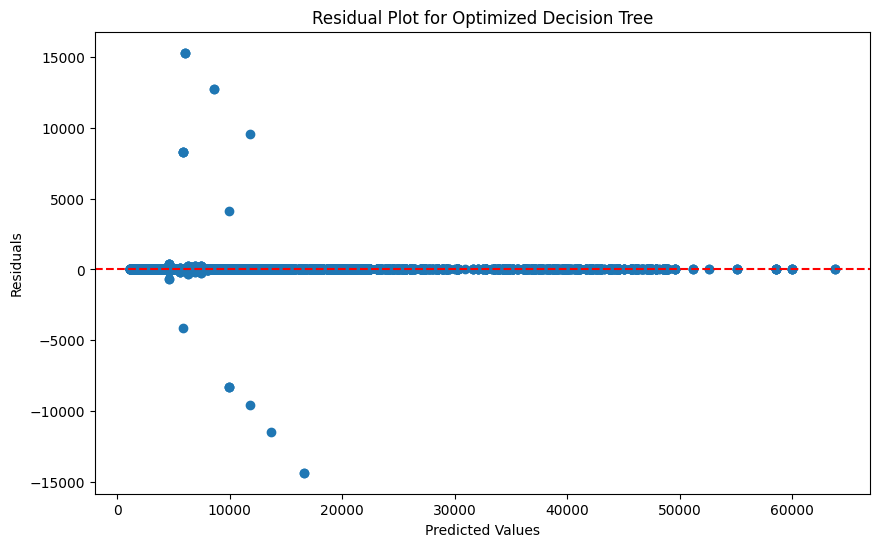

Mean of Residuals: 7.963338072065173
Standard Deviation of Residuals: 648.279090189327


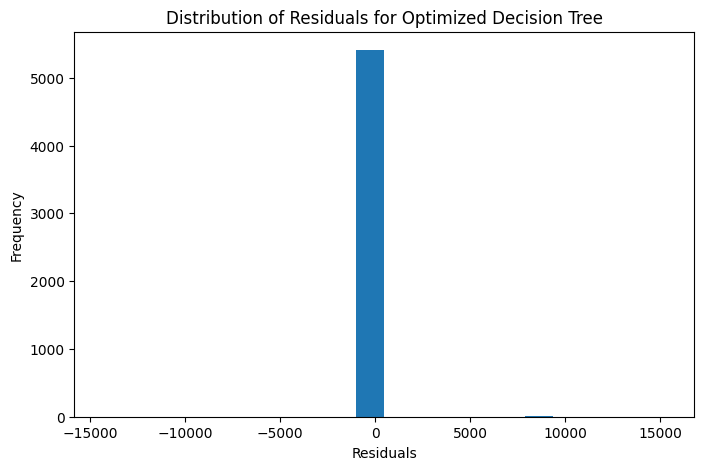

In [43]:
#  The differences between actual and predicted values)

# Calculate residuals for the best performing model (Decision Tree in this case)
residuals_best_tree = y_test_original.flatten() - y_pred_best_tree.flatten()

# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_tree, residuals_best_tree)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Optimized Decision Tree')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Calculate and print some descriptive statistics of the residuals
print("Mean of Residuals:", np.mean(residuals_best_tree))
print("Standard Deviation of Residuals:", np.std(residuals_best_tree))

# You can also create a histogram of the residuals to visualize their distribution
plt.figure(figsize=(8, 5))
plt.hist(residuals_best_tree, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals for Optimized Decision Tree')
plt.show()


Mean of Residuals (~$8)

    Indicates that, on average, your model slightly underpredicts insurance charges by a negligible amount.
    The mean is close enough to zero to consider the bias insignificant.

Standard Deviation of Residuals (~$648)

    The typical error magnitude in this prediction.
    Aligns closely with the RMSE, reinforcing the reliability of this error estimate.
  
Outliers

    Keep in mind the following: Outliers can significantly impact the standard deviation and RMSE. I could address this to enhance the accuracy of my prediction.

Overall Model Performance:

    Combined with your previously mentioned R-squared value and MAE, these metrics suggest that your model is robust and reliable for predicting insurance charges Based on the provided features.

In [44]:
#'best_tree_model' is the trained Decision Tree Regressor
importances = best_tree_model.feature_importances_
feature_names = X.columns  # X is your feature DataFrame

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)


                     Feature    Importance
8     bmi_smoker_interaction  7.778847e-01
6                Age_Squared  7.376477e-02
0                        bmi  5.632546e-02
2                        Age  3.571935e-02
1                   children  1.602563e-02
7     age_smoker_interaction  9.789147e-03
13                  sex_male  8.810115e-03
15          region_northwest  5.790413e-03
16          region_southeast  4.865886e-03
17          region_southwest  2.810870e-03
19           Age_Group_31-45  2.523195e-03
20           Age_Group_46-60  2.303197e-03
18           Age_Group_19-30  1.934503e-03
23   bmi_category_overweight  1.309800e-03
9            height_in_total  8.487771e-05
12          weight_in_pounds  3.229072e-05
22        bmi_category_obese  1.759146e-05
3                   Diabetes  3.943042e-06
21             Age_Group_61+  3.294447e-06
24  bmi_category_underweight  1.013702e-06
10                 height_ft  3.424051e-16
11                 height_in  1.743647e-16
4      Bloo

### Feature importance of  the Decision Tree Regressor
    
    Since it is the best model

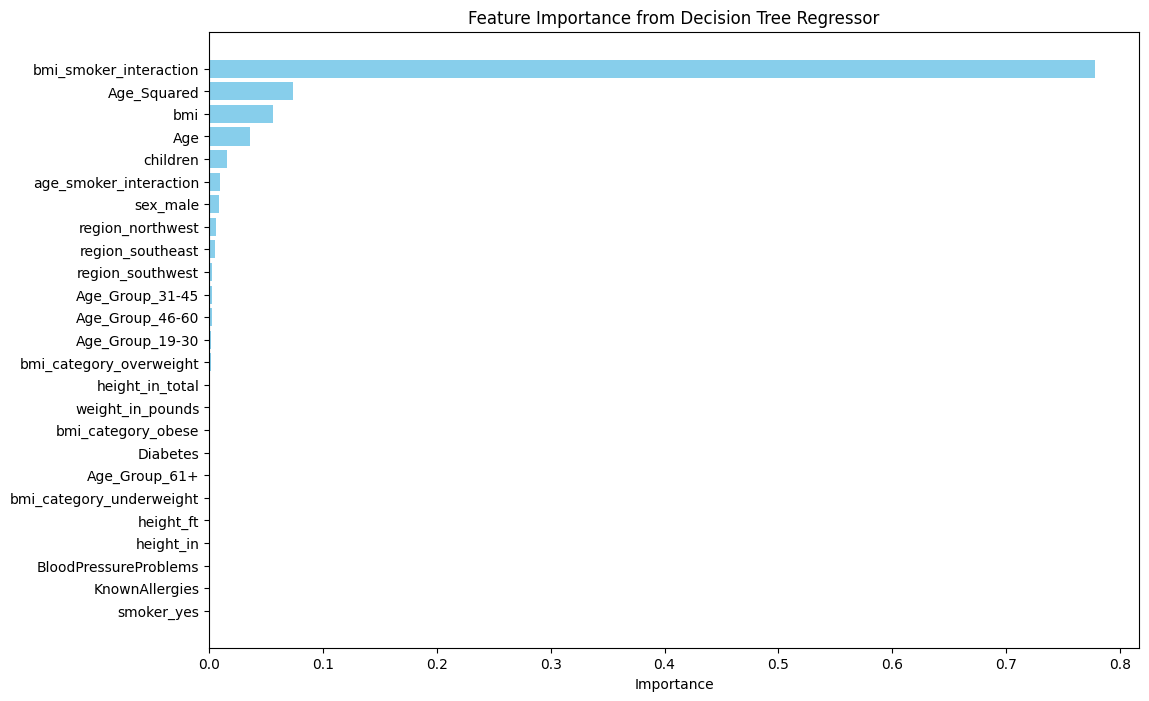

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree Regressor')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()



### Feature Importance Interpretation:

BMI-Smoker Interaction

    This is the most significant factor in predicting healthcare insurance costs.
    It indicates that the combination of BMI and smoking status has the largest impact on costs.

Age

    Age is the second most important factor, suggesting that as people get older, healthcare costs tend to rise significantly.

BMI

    This factor also plays a significant role in predicting costs,
    implying that body mass index (BMI) is a key to determining healthcare costs.

Age-Squared

    The squared age feature is somewhat essential, capturing the nonlinear effects of age on healthcare costs.

    Other features such as children, male sex, and region have smaller, but still noticeable, contributions.

    However, many features, including known allergies, diabetes, and blood pressure problems, seem to have little to no influence in the decision tree model.



 Feature importance of  the Decision Tree Regressor using Shap

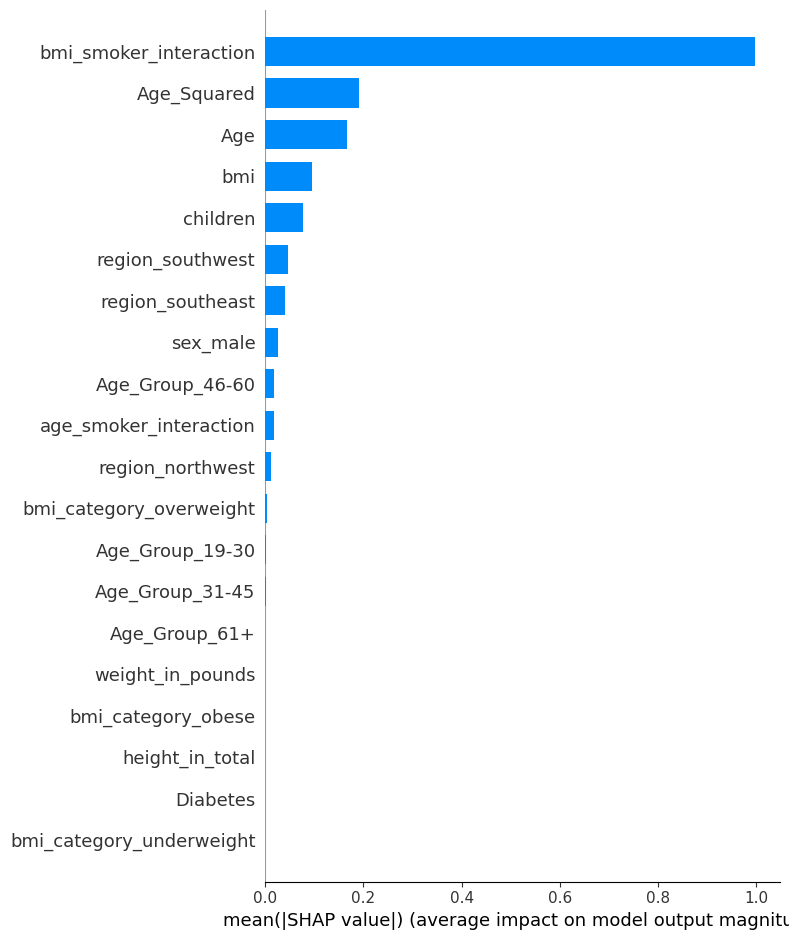

In [57]:
!pip install shap
import shap

# Create the SHAP explainer for the random forest model
explainer = shap.TreeExplainer(best_tree_model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot for feature importance based on SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")  # Bar plot for overall feature importance


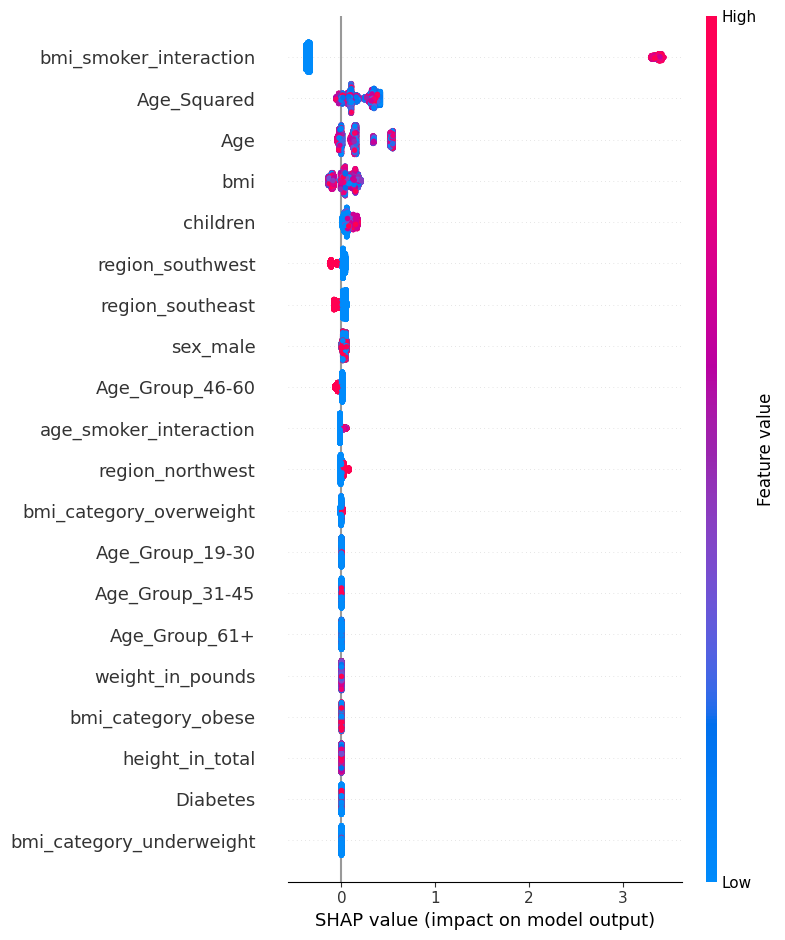

In [58]:
# Create a SHAP summary plot to visualize the overall feature importance for the test set
shap.summary_plot(shap_values, X_test)


### Moderate Importance Features
bmi_smoker_interaction:

    The combination of BMI and smoking status significantly affects insurance charges.
    Indicates that smokers with higher BMI might have substantially higher charges.
Age:

    Older individuals tend to have higher insurance charges due to increased health risks.
BMI:

    Higher BMI is associated with increased health risks, leading to higher charges.

### Moderate Importance Features

age_smoker_interaction:

    Older smokers might incur higher charges due to compounded health risks.
Smoker Status:

    Smoking independently increases insurance charges.

### Low Importance Features
Children:

    Number of children has a smaller impact on charges.

Region and Sex:

    Geographical location and gender may have minimal influence in this dataset.


In [48]:
X_test.head()

,bmi,children,Age,Diabetes,BloodPressureProblems,KnownAllergies,Age_Squared,age_smoker_interaction,bmi_smoker_interaction,height_in_total,...,region_northwest,region_southeast,region_southwest,Age_Group_19-30,Age_Group_31-45,Age_Group_46-60,Age_Group_61+,bmi_category_obese,bmi_category_overweight,bmi_category_underweight
9038,33.100,0,45,0,1,0,2025,0,0.000,62.204724,...,False,False,True,False,False,True,False,True,False,False
19298,42.900,2,51,1,1,0,2601,51,42.900,64.566929,...,False,True,False,False,False,True,False,True,False,False
19680,34.320,5,39,0,0,0,1521,0,0.000,63.385827,...,False,True,False,False,True,False,False,True,False,False
19365,27.835,1,34,0,0,0,1156,34,27.835,58.661417,...,True,False,False,False,True,False,False,False,True,False
7733,43.340,2,35,1,0,0,1225,0,0.000,69.291339,...,False,True,False,False,True,False,False,True,False,False


In [49]:
X_test.shape

(5427, 25)

    I chose the Decision Tree model over the Random Forest for deployment because it's accurate, easier to understand, and requires fewer resources.
    
    The Decision Tree's simplicity and interpretability make it more suitable for non-technical users and scenarios where transparency is crucial.

    Additionally, with some adjustments, the Decision Tree's performance was optimized, making the slight accuracy difference with the Random Forest negligible.

    Therefore, the Decision Tree was preferred for its balanced accuracy, simplicity, and deployment efficiency.

In [50]:
import joblib

# Save the trained Decision Tree model
joblib.dump(best_tree_model, 'best_decision_tree_model.pkl')

# Save the scalers used during preprocessing (if any)
joblib.dump(feature_scaler, 'feature_scaler.pkl')
joblib.dump(target_scaler, 'target_scaler.pkl')


['target_scaler.pkl']

## Load the Model and Scalers in Deployment


In [51]:
import joblib

# Load the trained Decision Tree model
best_tree_model = joblib.load('best_decision_tree_model.pkl')

# Load the scalers
feature_scaler = joblib.load('feature_scaler.pkl')
target_scaler = joblib.load('target_scaler.pkl')


### Prepare Incoming Data for Prediction

In [52]:
import pandas as pd

# Example input data (replace with actual input values)
input_data = {
    'Age': 31,
    'bmi': 25,
    'children': 2,
    'age_smoker_interaction': 31,  # Age * smoker (assuming smoker_yes = 1)
    'bmi_smoker_interaction': 25,  # BMI * smoker
    # Categorical variables (ensure to match the columns in the training data)
    'sex_male': 1,
    'smoker_yes': 1,
    'region_northwest': 0,
    'region_southeast': 0,
    'region_southwest': 0,
    'Age_Group_19-30': 0,
    'Age_Group_31-45': 1,
    'Age_Group_46-60': 0,
    'Age_Group_61+': 0,
    'bmi_category_normal': 0,
    'bmi_category_overweight': 1,
    'bmi_category_obese': 0,
    # Add any other necessary features
}

# Convert input data to DataFrame
input_df = pd.DataFrame([input_data])

# Ensure all features are present
missing_cols = set(X_train.columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0  # Default value

# Reorder columns to match training data
input_df = input_df[X_train.columns]


In [53]:
# Scale the input features using the loaded scaler
input_scaled = feature_scaler.transform(input_df)


In [54]:
# Make prediction
prediction_scaled = best_tree_model.predict(input_scaled)

# Inverse transform the prediction to get the actual insurance cost
prediction = target_scaler.inverse_transform(prediction_scaled.reshape(-1, 1))

# Print the predicted insurance cost
print('The predicted insurance cost is $', round(prediction[0][0], 2))


The predicted insurance cost is $ 17942.11


## Conclusion:

    The most influential feature is the interaction between BMI and smoking, which highlights the combined impact of BMI and smoking on medical costs or premiums. This suggests that individuals who smoke and have a higher BMI are at a significantly higher risk, leading to higher charges.

    Age and BMI are also important, but their influence is less significant compared to the interaction between BMI and smoking.

    Other demographic factors such as region and number of children have minimal impact, while health-related variables like known allergies and family history of cancer contribute very little in this specific dataset.

### Recommendations

    Based on my analysis and model performance, I propose the following recommendations:

Include More Health Indicators

    It's important to include health-related factors like exercise frequency, diet, and pre-existing conditions to improve insurance cost predictions."

Regular Model Updates

    The model should be updated regularly with new data to stay relevant.

Custom Premium Adjustments

    Insurance companies could use real-time health data from wearable technology to offer personalized premiums.

Education on Preventive Health

    Insurers can use this analysis insight to offer educational resources to high-risk groups and encourage healthy lifestyles to reduce future costs.